In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering

In [2]:
crime1=pd.read_csv('crime_data.csv')
crime1.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
# lets name the unnamed 1st col to city
crime= crime1.rename({'Unnamed: 0':'City'},axis=1)
crime.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
data=crime.drop(['City'],axis=1)
data.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


## Hierarchical clustering

In [5]:
# Normalization function 
def norm_func(i):
    X=(i-i.min())/(i.max()-i.min())
    return(X)

In [6]:
df_norm=norm_func(data)
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


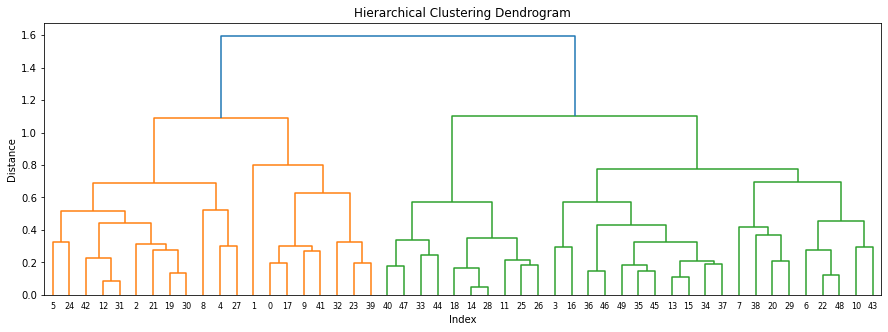

In [7]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch

dendogram=linkage(df_norm,method='complete',metric='euclidean')

plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    dendogram,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

#or

#dendogram=sch.dendrogram(sch.linkage(df_norm,method='complete'))

In [8]:
# to select the no of clusters

#sqrt(n/2) = sqrt(49/2) = sqrt(24.5)

n=24.5**0.5
n

# we can go for K = 4

4.949747468305833

In [9]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [10]:
# save clusters for chart
y_hc=hc.fit_predict(df_norm)
clusters=pd.DataFrame(y_hc,columns=['cluster'])

In [11]:
clusters.head()

,cluster
0,0
1,0
2,3
3,1
4,3


In [12]:
final_hc=pd.concat([clusters,crime],axis=1)
final_hc.head()

,cluster,City,Murder,Assault,UrbanPop,Rape
0,0,Alabama,13.2,236,58,21.2
1,0,Alaska,10.0,263,48,44.5
2,3,Arizona,8.1,294,80,31.0
3,1,Arkansas,8.8,190,50,19.5
4,3,California,9.0,276,91,40.6


In [13]:
final_hc.cluster.value_counts()

1    20
3    12
2    10
0     8
Name: cluster, dtype: int64

In [14]:
final_hc.groupby('cluster').mean()

,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,14.087500,252.750000,53.500000,24.5375
1,5.715000,132.300000,70.800000,18.1000
2,3.180000,78.700000,49.300000,11.6300
3,10.883333,256.916667,78.333333,32.2500


## K_means

In [15]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

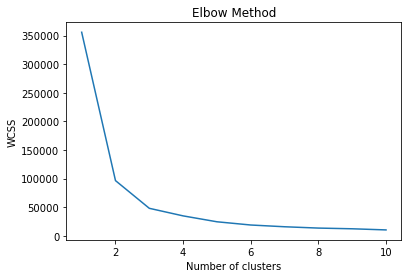

In [16]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
#Build Cluster algorithm
clusters_k = KMeans(n_clusters=4)
clusters_k.fit(df_norm)

KMeans(n_clusters=4)

In [18]:
clusters_k.labels_

array([1, 2, 2, 1, 2, 2, 3, 3, 2, 1, 3, 0, 2, 3, 0, 3, 0, 1, 0, 2, 3, 2,
       0, 1, 3, 0, 0, 2, 0, 3, 2, 2, 1, 0, 3, 3, 3, 3, 3, 1, 0, 1, 2, 3,
       0, 3, 3, 0, 0, 3])

In [19]:
#Assign clusters to the data set
data['clusters_k_id'] = clusters_k.labels_

In [20]:
#these are standardized values.
clusters_k.cluster_centers_

array([[0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.30439405, 0.32937147, 0.70588235, 0.31098951]])

In [21]:
clusters_k_id=pd.Series(clusters_k.labels_)
clusters_k_id.head()

0    1
1    2
2    2
3    1
4    2
dtype: int32

In [27]:
final_k=pd.concat([clusters_k_id,data],axis=1)
final_k.head()

,0,Murder,Assault,UrbanPop,Rape,clusters_k_id
0,1,13.2,236,58,21.2,1
1,2,10.0,263,48,44.5,2
2,2,8.1,294,80,31.0,2
3,1,8.8,190,50,19.5,1
4,2,9.0,276,91,40.6,2


In [28]:
final_k.clusters_k_id.value_counts()

3    17
0    13
2    12
1     8
Name: clusters_k_id, dtype: int64

In [24]:
final_k.groupby('clusters_k_id').mean()

,0,Murder,Assault,UrbanPop,Rape
clusters_k_id,,,,,
0,0,3.600000,78.538462,52.076923,12.176923
1,1,13.937500,243.625000,53.750000,21.412500
2,2,10.966667,264.000000,76.500000,33.608333
3,3,5.852941,141.176471,73.647059,19.335294


## DBSCAN

In [29]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
data=crime1.drop(['Unnamed: 0'],axis=1)
data.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [32]:
array=data.values
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [33]:
stscaler=StandardScaler().fit(array)
X=stscaler.transform(array)

In [34]:
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [35]:
X.mean()

1.021405182655144e-16

In [36]:
dbscan=DBSCAN(eps=1.1,min_samples=4)
dbscan.fit(X)

DBSCAN(eps=1.1, min_samples=4)

In [37]:
dbscan.labels_

array([ 0, -1,  1,  2, -1, -1,  2, -1, -1, -1,  2,  2,  1,  2,  2,  2,  2,
        0,  2,  1,  2,  1,  2,  0,  2,  2,  2, -1,  2,  2,  1,  1,  0,  2,
        2,  2,  2,  2,  2,  0,  2,  0,  1,  2,  2,  2,  2,  2,  2,  2],
      dtype=int64)

In [38]:
cluster_dbscan=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cluster_dbscan

,cluster
0,0
1,-1
2,1
3,2
4,-1
5,-1
6,2
7,-1
8,-1
9,-1


In [39]:
final_dbscan=pd.concat([cluster_dbscan,data],axis=1)
final_dbscan

,cluster,Murder,Assault,UrbanPop,Rape
0,0,13.2,236,58,21.2
1,-1,10.0,263,48,44.5
2,1,8.1,294,80,31.0
3,2,8.8,190,50,19.5
4,-1,9.0,276,91,40.6
5,-1,7.9,204,78,38.7
6,2,3.3,110,77,11.1
7,-1,5.9,238,72,15.8
8,-1,15.4,335,80,31.9
9,-1,17.4,211,60,25.8


In [40]:
final_dbscan.cluster.value_counts()

 2    30
 1     7
-1     7
 0     6
Name: cluster, dtype: int64